In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

%matplotlib inline

In [2]:
age_profiles = pd.read_json('assignment_package/age_profiles.json')

In [3]:
age_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 41 columns):
contributors_enabled                  2410 non-null bool
created_at                            2410 non-null datetime64[ns]
default_profile                       2410 non-null bool
default_profile_image                 2410 non-null bool
description                           2410 non-null object
entities                              2410 non-null object
favourites_count                      2410 non-null int64
follow_request_sent                   2410 non-null bool
followers_count                       2410 non-null int64
following                             2410 non-null bool
friends_count                         2410 non-null int64
geo_enabled                           2410 non-null bool
id                                    2410 non-null int64
id_str                                2410 non-null int64
is_translation_enabled                2410 non-null bool
is_translator      

In [4]:
age_profiles.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7931,False,274,False,264,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{u'contributors': None, u'truncated': False, u...",12230,Atlantic Time (Canada),None,-10800.0,False
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{u'description': {u'urls': []}},1141,False,481,False,527,True,490791079,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{u'lang': u'en', u'favorited': False, u'contri...",14680,Hawaii,None,-36000.0,False
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{u'description': {u'urls': []}},174,False,878,False,953,False,264416315,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{u'contributors': None, u'truncated': False, u...",22857,Hawaii,None,-36000.0,False
3,False,2009-12-17 20:08:55,False,False,NEVER care about what a person says that doesn...,{u'description': {u'urls': []}},303,False,742,False,701,False,97515432,97515432,False,False,en,30,•Carolina South• 843•,. keeleesha,False,131516,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,NaN,http://pbs.twimg.com/profile_images/4939742059...,https://pbs.twimg.com/profile_images/493974205...,009999,FFFFFF,EFEFEF,333333,True,False,Keeleesha,"{u'contributors': None, u'truncated': False, u...",71654,Eastern Time (US & Canada),None,-14400.0,False
4,False,2011-03-24 21:14:53,False,False,these niggas some haters & i made myself so ea...,{u'description': {u'urls': []}},52,False,729,False,688,False,271608323,271608323,False,False,en,0,Seven•five•Seven,killakee :),False,0A0A0A,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/27160832...,http://pbs.twimg.com/profile_images/4627093362...,https://pbs.twimg.com/profile_images/462709336...,D62D0F,000000,000000,A3A3A3,True,False,KeeLashawn_,"{u'contributors': None, u'truncated': False, u...",48452,Eastern Time (US & Canada),None,-14400.0,False


In [5]:
age_profiles.describe()

,favourites_count,followers_count,friends_count,id,id_str,listed_count,statuses_count,utc_offset
count,2410.000000,2410.000000,2410.000000,2.410000e+03,2.410000e+03,2410.000000,2410.000000,1697.000000
mean,1800.120332,944.855187,689.358921,6.918280e+08,6.918280e+08,5.470124,16982.506224,-12402.710666
std,3884.458445,7083.829476,4970.227333,7.953757e+08,7.953757e+08,34.984290,25033.534126,15420.244205
min,0.000000,0.000000,-69.000000,2.025381e+06,2.025381e+06,0.000000,0.000000,-39600.000000
25%,103.000000,160.000000,179.000000,1.592982e+08,1.592982e+08,0.000000,1960.250000,-18000.000000
50%,543.000000,348.000000,340.000000,3.508023e+08,3.508023e+08,1.000000,7408.500000,-18000.000000
75%,1949.500000,700.250000,628.000000,8.804243e+08,8.804243e+08,3.000000,21565.250000,-10800.000000
max,99169.000000,258937.000000,202293.000000,2.832494e+09,2.832494e+09,1292.000000,257590.000000,43200.000000


## 1. Make   histograms   of   followers   count,   friends   count,   favorite   count,   and   status count,   all   of   which   are   in    age_profiles.csv .

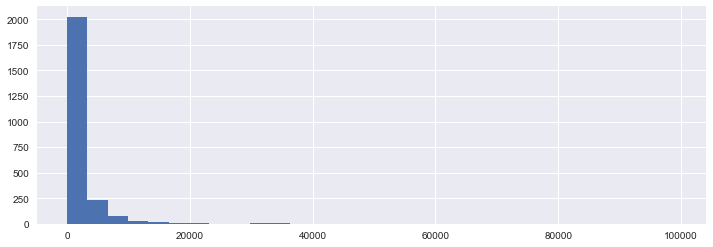

In [6]:
age_profiles.favourites_count.hist(bins=30, figsize=(12,4))

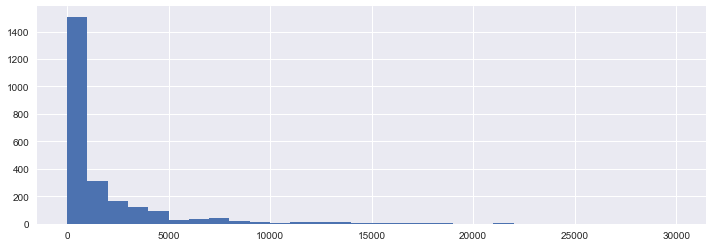

In [7]:
age_profiles[age_profiles['favourites_count']<30000]['favourites_count'].hist(bins=30, figsize=(12,4))

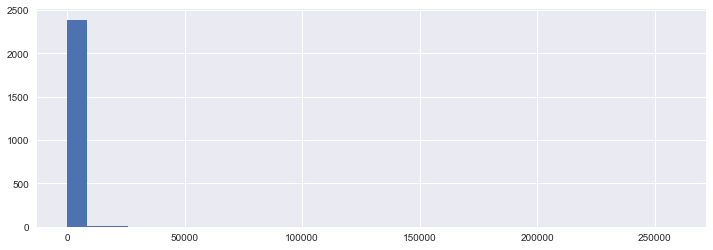

In [8]:
age_profiles.followers_count.hist(bins=30, figsize=(12,4))

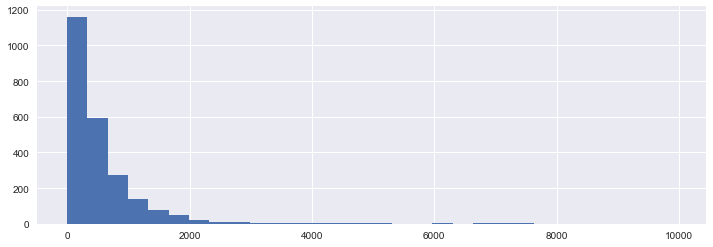

In [9]:
age_profiles[age_profiles['followers_count']<10000].followers_count.hist(bins=30, figsize=(12,4))

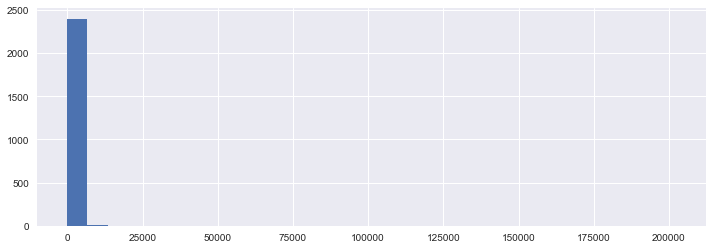

In [10]:
age_profiles.friends_count.hist(bins=30, figsize=(12,4))

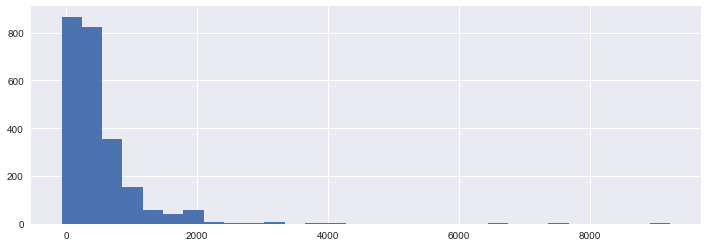

In [11]:
age_profiles[age_profiles['friends_count']<10000].friends_count.hist(bins=30, figsize=(12,4))

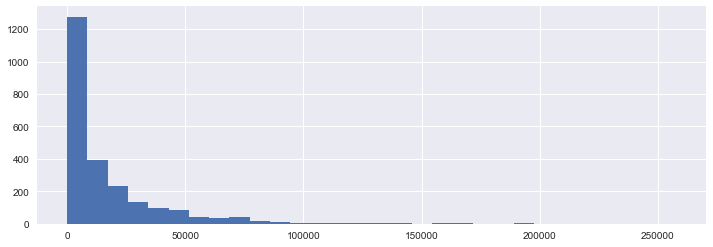

In [12]:
age_profiles.statuses_count.hist(bins=30, figsize=(12,4))

In [13]:
age_profiles[['favourites_count','followers_count', 'friends_count', 'statuses_count']].corr()

,favourites_count,followers_count,friends_count,statuses_count
favourites_count,1.000000,0.020342,0.002715,0.171091
followers_count,0.020342,1.000000,0.935946,0.077311
friends_count,0.002715,0.935946,1.000000,0.030932
statuses_count,0.171091,0.077311,0.030932,1.000000


Insights: 
1. Friends and followers are strongly correlated, with a correlation of 0.9359.
2. Statuses_count and favourites_count are extremely weakly correlated, with a correlation of 0.1711.
3. statuses_count and followers_count/friends_count are extremely weakly correlated, with a correlation of 0.0773 and 0.0309.

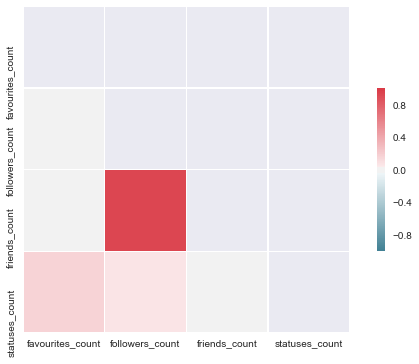

In [14]:
corr = age_profiles[['favourites_count','followers_count', 'friends_count', 'statuses_count']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2. Which   time   zone   has   the   highest   proportion   of   known   iOS   users   in age_profiles.csv ?      Which   time   zone   has   the   highest   proportion   of   Android   users?

In [15]:
age_tweets = pd.read_json('assignment_package/age_tweets.json')

In [16]:
age_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28138 entries, 0 to 28137
Data columns (total 25 columns):
contributors                 0 non-null float64
coordinates                  1298 non-null object
created_at                   28138 non-null datetime64[ns]
entities                     28138 non-null object
favorite_count               28138 non-null int64
favorited                    28138 non-null bool
geo                          1298 non-null object
id                           28138 non-null int64
id_str                       28138 non-null int64
in_reply_to_screen_name      5299 non-null object
in_reply_to_status_id        4839 non-null float64
in_reply_to_status_id_str    4839 non-null float64
in_reply_to_user_id          5299 non-null float64
in_reply_to_user_id_str      5299 non-null float64
lang                         28138 non-null object
metadata                     28138 non-null object
place                        1341 non-null object
possibly_sensitive          

In [17]:
age_tweets['user'].apply(pd.Series).rename(columns = lambda x: 'user_' + str(x))

,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
0,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
1,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
2,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
3,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
4,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
5,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,Tru

In [18]:
new_df = pd.concat([age_tweets.drop('user', axis=1), pd.DataFrame(age_tweets['user'].apply(pd.Series).rename(columns = lambda x: 'user_' + str(x)))], axis=1)

In [19]:
new_df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
0,NaN,None,2014-09-26 05:55:45,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379174454747136,515379174454747136,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,7,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlenaBacalia: i over think and second gues...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
1,NaN,None,2014-09-26 05:58:17,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379813670854656,515379813670854656,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,80,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @hfholden34: I've wasted too much time on t...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
2,NaN,None,2014-09-26 05:59:47,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515380190361288704,515380190361288704,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already gone.,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False
3,NaN,None,2014-09-26 06:00:07,"{u'symbols': [], u'user_mentions': 

In [27]:
# parse html in original source column:
for i in xrange(len(new_df.source)):
    soup = BeautifulSoup(new_df.source[i], 'html.parser')
    new_df.loc[i, 'source_parsed'] = soup.text    

In [28]:
new_df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified,source_parsed
0,NaN,None,2014-09-26 05:55:45,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379174454747136,515379174454747136,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,7,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlenaBacalia: i over think and second gues...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPhone
1,NaN,None,2014-09-26 05:58:17,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379813670854656,515379813670854656,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,80,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @hfholden34: I've wasted too much time on t...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPhone
2,NaN,None,2014-09-26 05:59:47,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515380190361288704,515380190361288704,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already gone.,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPh

In [29]:
new_df.source_parsed.value_counts()

Twitter for iPhone             15440
Twitter for Android             5093
Instagram                       1503
Twitter Web Client              1414
IFTTT                            481
Echofon                          422
Twitter for iPad                 345
Twittascope                      334
Twitter for Windows Phone        297
Mobile Web (M5)                  243
Facebook                         211
Twitter for BlackBerry®          209
TweetCaster for Android          179
Plume for Android                176
Twitter for Android Tablets      139
Tweetbot for iΟS                 130
Tweetlogix                       116
iOS                              111
Unfollowers.me                   106
TweetDeck                         96
Mobile Web (M2)                   96
Twitter for Websites              82
Cloudhopper                       59
fllwrs                            57
Tumblr                            56
dlvr.it                           55
Twitter for BlackBerry            53
P

In [33]:
# how many users are there in age_profiles?
age_profiles.id.nunique()

2410

In [32]:
# how many users are there in age_tweets?
new_df.user_id.nunique()

2195

In [42]:
# define ios devices:
ios = ['Twitter for iPhone', 'Twitter for iPad', 'iOS', 'Twitter for Mac', 'Tweetbot for Mac',
       'TweetCaster for iOS', 'Tweetbot for iΟS', 'Osfoora for iOS', 'UberSocial for iPhone', 'OS X',
       'Instagram on iOS', '8 Ball Pool™ on iOS', 'Photos on iOS']

In [43]:
android = ['Twitter for Android', 'TweetCaster for Android', 'Plume for Android',
          'Twitter for Android Tablets', 'Twitter for  Android', 'UberSocial for Android',
          'Vine for Android', 'Fenix for Android', 'Echofon  Android']

In [65]:
# create a new column as source_ios, in order to get proportion
new_df['source_ios'] = (new_df['source_parsed'].isin(ios)).astype(int)
new_df['source_android'] = (new_df['source_parsed'].isin(android)).astype(int)

In [66]:
new_df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified,source_parsed,source_ios,source_android
0,NaN,None,2014-09-26 05:55:45,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379174454747136,515379174454747136,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,7,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlenaBacalia: i over think and second gues...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPhone,1,0
1,NaN,None,2014-09-26 05:58:17,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379813670854656,515379813670854656,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,80,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @hfholden34: I've wasted too much time on t...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPhone,1,0
2,NaN,None,2014-09-26 05:59:47,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515380190361288704,515380190361288704,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already gone.,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),N

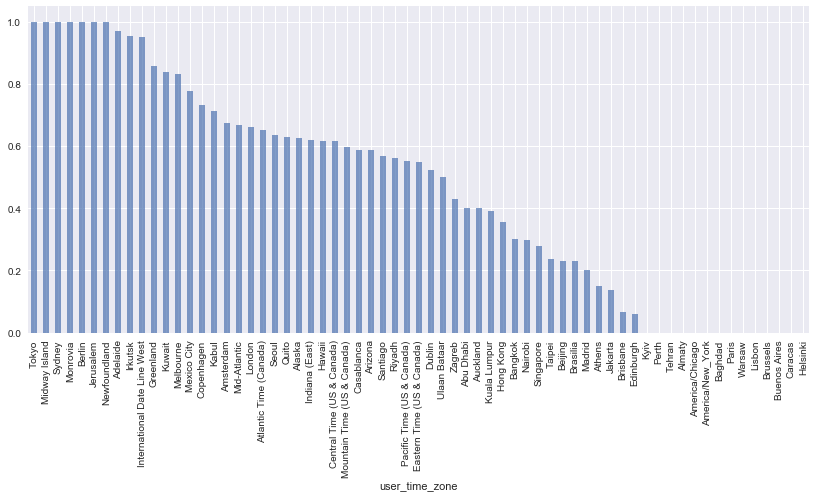

In [84]:
(new_df['source_ios'].groupby(new_df['user_time_zone']).sum() / 
new_df['source_ios'].groupby(new_df['user_time_zone']).count()).sort_values(ascending=False) \
.plot(kind='bar', figsize=(14,6), alpha=.7)

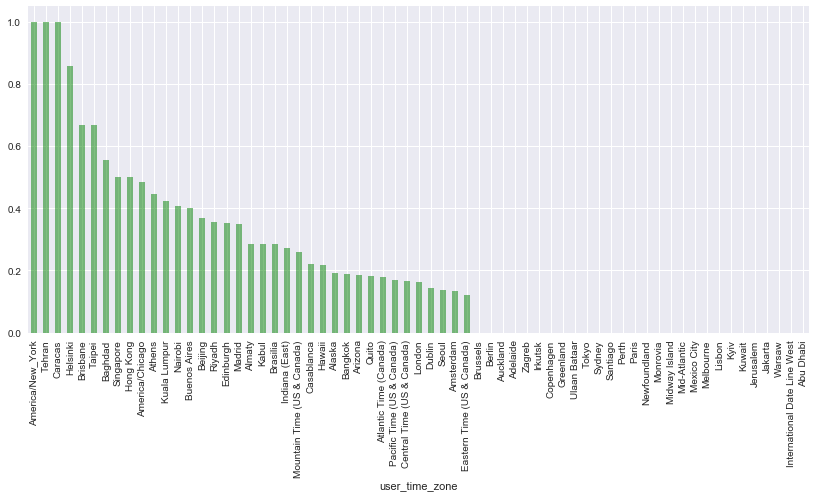

In [83]:
(new_df['source_android'].groupby(new_df['user_time_zone']).sum() / 
new_df['source_android'].groupby(new_df['user_time_zone']).count()).sort_values(ascending=False)\
.plot(kind='bar', figsize=(14,6), color='g', alpha=.5)

**Reason:** time_zone input is messy, "America/New_York" is actually the same with "Eastern Time", "America/New_York" only has 15 data points, and all of them are from Android devices. In order to get more accurate result, more data cleaning work need to be done.

## 3. Use   the   “mentions”   data   in    mentions.csv    to   come   up   with   a   list   of   Twitter   handles that   were   mentioned   by   more   than   one   user.

In [88]:
mentions = pd.read_csv('assignment_package/mentions.csv')

In [89]:
mentions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17695 entries, 0 to 17694
Data columns (total 3 columns):
ID                 17695 non-null int64
MentionedID        17695 non-null int64
MentionedHandle    17695 non-null object
dtypes: int64(2), object(1)
memory usage: 414.8+ KB


In [90]:
mentions.head()

,ID,MentionedID,MentionedHandle
0,612815277,798747864,AlenaBacalia
1,612815277,354590068,hfholden34
2,612815277,401111769,MarilynYousif
3,612815277,35581752,heeeeyerin
4,612815277,1591956090,DogeTheDog


In [122]:
# Twitter handles that have been mentioned by more than 1 user:
result = mentions['ID'].groupby(mentions['MentionedID']).nunique() > 1
r1 = result.reset_index()
r2 = r1[r1['ID']==True]

In [136]:
# final result for question 3
list_of_handles = mentions[mentions['MentionedID'].isin(r2['MentionedID'])]['MentionedHandle'].unique()